**TP Softmax et regression logistique multiclasse **

Le but de ce TP est d'implementer un cout softmax (une extension de la regression logistique au cas multiclasse). Dans ce contexte, la modélisation de la probabilité d'appartenance à une classe est donnée par 
$$
P(y =k | x ) = \frac{\exp{(x^\top w_k)}}{\sum_{j=1}^C\exp{(x^\top w_j)}}
$$
où $w_k$ est un vecteur de $\mathbb{R}^d$.

En considérant que $y_{i,j}$ représente la probabilité d'appartenance à une classe $j$ de l'exemple x_i,  la fonction de cout  cross-entropy s'écrit

$$
L(y_i, \hat y_i) = - \sum_{j=1}^C y_{i,j} \log( \hat y_{i,j})
 $$
 où  $\hat y_{i,j}$ est modélisé par un softmax
 
 Nous allons implémenté ici, un modele linéaire multi-classe appris telle que
 
 $$
 \min_W \frac{1}{n} \sum_i L(y_i,\hat y_i) + \frac{\lambda}{2}  \sum_{i,j} w_{i,j}^2
 $$
 $W$ represente ici une matrice de taille $d\times C$ contenant l'ensemble des $\{w_k\}$

Nous allons tous d'abord charger des données relatives à un  problème de reconnaissance de chiffres manuscrites

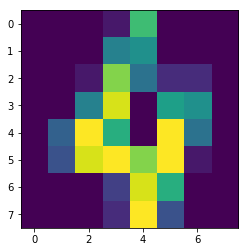

In [267]:

import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
n_class = 10
X,y = load_digits(n_class=n_class, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plt.imshow(X[4].reshape(8,8))

Ensuite, nous allons créer des fonctions permettant


1.  de representer les classes comme une probabilé d'appartenance à une classe
2.  d'evaluer une fonction softmax  étant donné un $z= x^\top w$
3.  d'estimer la probabilité d'appartenance d'un ensemble d'exemple etant donné les points $W$ 



In [268]:
def oneHotEncodage(y,n_class):
    n = y.shape[0]
    y_one = np.zeros((n,n_class))
    for i in range(n):
        y_one[i,y[i]] = 1
    return y_one


def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T/np.sum(np.exp(z), axis=1)).T
    return sm

def get_prob_pred(X,W):
    probs = softmax(X@W)
    preds = np.argmax(probs, axis=1)
    return probs,preds
  

Nous allons maintenant implémenter une fonction qui calcule la fonction de cout et le gradient. Nous serons ainsi en mesure d'implementer une descente de gradient avec backtracking pour optimiser les paramètres $W$.  

In [269]:
def get_loss_grad(W,X,y,lam,n_class):
    n = X.shape[0] #First we get the number of training examples
    y_mat = oneHotEncodage(y,n_class) #Next we convert the integer class coding into a one-hot representation
    scores = X@W  #Then we compute raw class scores given our input and current weights
    probs = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    
    loss = (-1/n) *np.sum(y_mat * np.log(probs)) + (lam/2) * np.sum(W.T@W)
    grad = (-1/n) * X.T @ (y_mat - probs) + lam * W
    return loss,grad

In [270]:
W = np.zeros([X.shape[1],len(np.unique(y))])
lam = 1
nb_iter = 1000
beta = 0.5
pas = 1e-2
losses = []
for i in range(nb_iter):
    
    # gradient descent with backtracking
    # insert your code here
    loss, grad = get_loss_grad(W,X_train,y_train,lam,n_class)
    losses.append(loss)
    W = W - pas*grad
print(loss)

0.2702571802544301




1.   Evaluer l'erreur de classification sur les données d'apprentissage après entrainement
2.   Afficher l'evolution de la fonction objective apres chaque itération



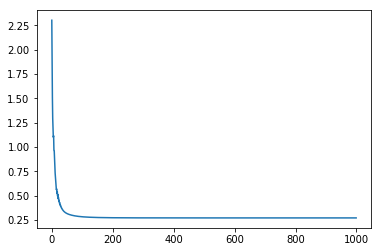

In [271]:
from matplotlib import pyplot as plt
plt.plot(losses)

In [272]:
prob, pred = get_prob_pred(X,W)
pred

array([0, 1, 2, ..., 8, 9, 8])

In [273]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [274]:
def getAccuracy(X, Y, W):
    prob, pred = get_prob_pred(X,W)
    acc = sum(pred == Y)/(float(len(Y)))
    return acc

print("The training accuracy is : ",getAccuracy(X_train, y_train, W))
print("The test accuracy is : ",getAccuracy(X_test, y_test, W))

The training accuracy is :  0.970906068162926
The test accuracy is :  0.9545454545454546


In [60]:
def backtrack(x,grad,cost,crit,sigma0,c,rho,fig = True): 
    d = -grad
    i = 0
    sigma = sigma0
    max_iter = 100
    sigma_list = []
    flist = []
    compar = cost(x + sigma * d )
    cost_x = cost(x)
    sigma_list = [sigma]
    flist = [compar]
    
    while compar > cost_x + c * sigma * crit  and i < max_iter:
        sigma = rho * sigma
        compar = cost(x + sigma * d)
        sigma_list.append(sigma)
        flist.append(compar)
        i += 1
    if fig == True:      
        return sigma, sigma_list, flist          
    else :
        return sigma

In [0]:
plt.plot(losses)